# Seasonal means

### Learning objectives

* import scientific data and manupulate using numpy
* understand the dimensionality of the data (space and time)
* use slicing to perform non-contiguous maths on the arrays (i.e. seasonal means)

### It might me helpful to know

* numpy arrays and slicing



In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
from netCDF4 import num2date
import netCDF4 as nc
import matplotlib.pyplot as plt


## Import Data

netCDF is a binary storage format popular in Earth Sciences. In this exercis, we simply want to corece the data into  Numpy array (2D). Becaue netCDF is a a more sophisticated data format that we're used to, we'll use a dedicated library `netCDF4`. The main point to remember is that we'll soon have a Numoy array - a familiar object that we know how to handlde. 

In [19]:
f = nc.Dataset('../../data/example_data.nc')
# We acess the data through a variables dictionary. 
# Let's print th dictionary keys so we know what we're dealing with
print(f.variables.keys())

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format UNDEFINED):
    title: /workspace/jhamman/processed/R1002RBRxaaa01a/lnd/temp/R1002RBRxaaa01a.vic.ha.1979-09-01.nc
    institution: U.W.
    source: RACM R1002RBRxaaa01a
    output_frequency: daily
    output_mode: averaged
    convention: CF-1.4
    references: Based on the initial model of Liang et al., 1994, JGR, 99, 14,415- 14,429.
    comment: Output from the Variable Infiltration Capacity (VIC) model.
    nco_openmp_thread_number: 1
    NCO: 4.3.7
    history: history deleted for brevity
    dimensions(sizes): time(36), y(205), x(275)
    variables(dimensions): float64 Tair(time,y,x), float64 time(time)
    groups: 

KeysView(OrderedDict([('Tair', <class 'netCDF4._netCDF4.Variable'>
float64 Tair(time, y, x)
    units: C
    long_name: Surface air temperature
    coordinates: latitude longitude
    dimensions: 2
    type_preferred: double
    time_rep: instantaneous
    _FillValue: 9.96920996839e+36
unli

In [26]:
 # use the keys 'Tair' and 'time' to get netcdf data as Numpy arrays
    
tair = f.variables['Tair'][:] # temperature variable
time = f.variables['time'][:] #time variable


In [21]:
#Let's find our what shape our numpy array is:
tair.shape

(36, 205, 275)

Okay, so that looks good. The netcdf variables dictionary (metadata) told us that the dimensions of this data set were: `dimensions(sizes): time(36), y(205), x(275)`

It also gave us a a nice summary of our data. The time axis has values that correspond to:

```
calendar: noleap
dimensions: 1
long_name: time
type_preferred: int
units: days since 0001-01-01
```

Let's use a slice to take a look at data for the first month:

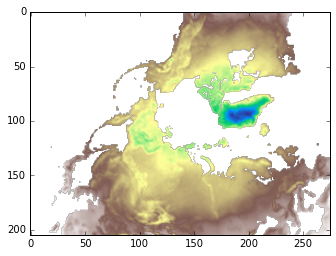

In [23]:
#Use our go-to 2D array plotting 
month1 = tair[0,:,:]
plt.imshow(test, cmap='terrain')

In [25]:
#And as usual, let's check the type of the data:

type(month1)

numpy.ma.core.MaskedArray

This might be somthing new to you. Masked arrays are arrays that may have missing or invalid entries. The numpy.ma module provides a nearly work-alike replacement for numpy that supports data arrays with masks.

In the lessons we dealt with some numpy arrays that contained NaNs. Masked arrays are nice because we use them almost exactly like we would an normal array. The masked parts of the array are simply invisible to the operations we perform. 

Remeber that when our Numpy arrays contained NaNs, we had to resort to using the special methods like `np.nanmean()` fucntions. With masked arrays we just call regular methods:

In [28]:
print('mean of month one is:', month1.mean())

mean of month one is: 8.18729243526


In [29]:
np.nan

nan

## get datetime objects

We're happy with the structure and behaviour of our spatial data. Now we should have a look at the `time` array we creaed.  

In [33]:
time[-1]

723658.0

Remember the netcdf variable dictionary, which contained metadata, told us that out time had "units: days since 0001-01-01". 

This is a great in one way, because days are a linear measurement of time, whereas months and years are not. We will, however, want to work with months and years, and this is where we use the `nc.num2date` function that we imported.


In [101]:
times = nc.num2date(time, 'days since 0001-01-01', 'noleap')
times

array([1980-09-16 12:00:00, 1980-10-17 00:00:00, 1980-11-16 12:00:00,
       1980-12-17 00:00:00, 1981-01-17 00:00:00, 1981-02-15 12:00:00,
       1981-03-17 00:00:00, 1981-04-16 12:00:00, 1981-05-17 00:00:00,
       1981-06-16 12:00:00, 1981-07-17 00:00:00, 1981-08-17 00:00:00,
       1981-09-16 12:00:00, 1981-10-17 00:00:00, 1981-11-16 12:00:00,
       1981-12-17 00:00:00, 1982-01-17 00:00:00, 1982-02-15 12:00:00,
       1982-03-17 00:00:00, 1982-04-16 12:00:00, 1982-05-17 00:00:00,
       1982-06-16 12:00:00, 1982-07-17 00:00:00, 1982-08-17 00:00:00,
       1982-09-16 12:00:00, 1982-10-17 00:00:00, 1982-11-16 12:00:00,
       1982-12-17 00:00:00, 1983-01-17 00:00:00, 1983-02-15 12:00:00,
       1983-03-17 00:00:00, 1983-04-16 12:00:00, 1983-05-17 00:00:00,
       1983-06-16 12:00:00, 1983-07-17 00:00:00, 1983-08-17 00:00:00], dtype=object)

What we have done is to transform those "days since 0001-01-01" into special object that originate in a module called datetime. 

In [31]:
print(type(times[0]))

<class 'netcdftime._datetime.datetime'>


You don't need to know much about the datetime objects, only that they have some useful attributes and methods:

In [38]:
print("day is:",times[0].day, "month is:",times[0].month, "year is:", times[0].year)

day is: 16 month is: 9 year is: 1980


## Creating our seasonal averages

Before operating on the whol data array, we will have a play around with the times array and see if we can find a way to manipulate our data so that we have, for instance, all of the Autumn data in one, all of the Summer data, amd so on. Let's have a look at how the times array looks:

In [73]:
print(times)

[1980-09-16 12:00:00 1980-10-17 00:00:00 1980-11-16 12:00:00
 1980-12-17 00:00:00 1981-01-17 00:00:00 1981-02-15 12:00:00
 1981-03-17 00:00:00 1981-04-16 12:00:00 1981-05-17 00:00:00
 1981-06-16 12:00:00 1981-07-17 00:00:00 1981-08-17 00:00:00
 1981-09-16 12:00:00 1981-10-17 00:00:00 1981-11-16 12:00:00
 1981-12-17 00:00:00 1982-01-17 00:00:00 1982-02-15 12:00:00
 1982-03-17 00:00:00 1982-04-16 12:00:00 1982-05-17 00:00:00
 1982-06-16 12:00:00 1982-07-17 00:00:00 1982-08-17 00:00:00
 1982-09-16 12:00:00 1982-10-17 00:00:00 1982-11-16 12:00:00
 1982-12-17 00:00:00 1983-01-17 00:00:00 1983-02-15 12:00:00
 1983-03-17 00:00:00 1983-04-16 12:00:00 1983-05-17 00:00:00
 1983-06-16 12:00:00 1983-07-17 00:00:00 1983-08-17 00:00:00]


In [81]:
#First split array of 36 months into 12 separate arrays, each an individual season
#We do this with the np.split fucntion (note that the output is actually a list of arrays)
seasons = np.array_split(times, 12)

In [84]:
#Next we use slicing on our list of arrays, with a 'step' parameter
#This gathers every fourth seasons, which is what we want
SON = seasons[::4]
DJF = seasons[1::4]
MAM = seasons[2::4]
JJA = seasons[3::4]
print(JJA, type(JJA))

[array([1981-06-16 12:00:00, 1981-07-17 00:00:00, 1981-08-17 00:00:00], dtype=object), array([1982-06-16 12:00:00, 1982-07-17 00:00:00, 1982-08-17 00:00:00], dtype=object), array([1983-06-16 12:00:00, 1983-07-17 00:00:00, 1983-08-17 00:00:00], dtype=object)] <class 'list'>


In [92]:
#Now we apply exactly the same steps to the time axis of our temperature data
#Note that because array_split creates lists, we need to manually convert back to arrays
dseasons = np.array_split(tair[:, :, :], 12)
yearlySON = np.array(dseasons[::4])
yearlyDJF = np.array(dseasons[1::4])
yearlyMAM = np.array(dseasons[2::4])
yearlyJJA = np.array(dseasons[3::4])

In [93]:
#Now we can compute the (UNWEIGHTED) Seasonal means
mean_spring = yearlySON.mean(axis=(0,1))
mean_summer = yearlyDJF.mean(axis=(0,1))
mean_autumn = yearlyMAM.mean(axis=(0,1))
mean_winter = yearlyJJA.mean(axis=(0,1))

## Masking arrays

In [94]:
np.ma.masked_where(mean_summer > 1e3, mean_summer)

masked_array(data =
 [[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [-- -- -- ..., 11.571700574660264 11.238393488101265 11.34147404542388]
 [-- -- -- ..., 11.936581549323327 11.137159724413936 11.325209177767757]
 [-- -- -- ..., 11.675352167516799 11.38354690858865 11.584251873116049]],
             mask =
 [[ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]
 ..., 
 [ True  True  True ..., False False False]
 [ True  True  True ..., False False False]
 [ True  True  True ..., False False False]],
       fill_value = 1e+20)

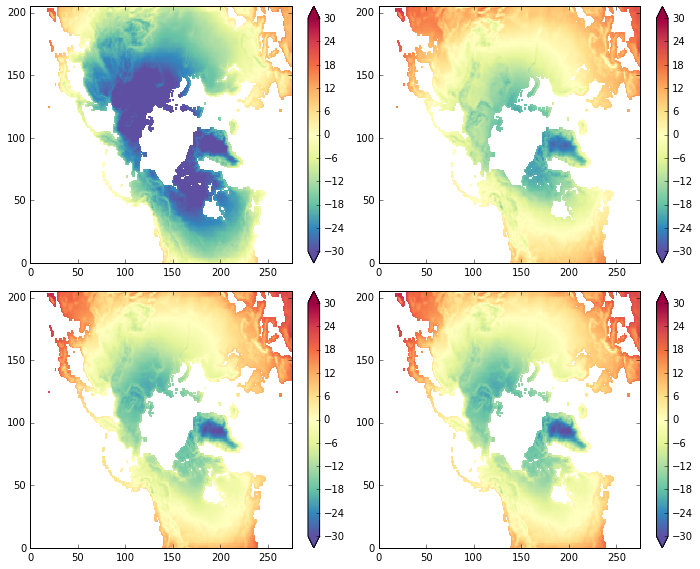

In [95]:
# plot with various axes scales
fig = plt.figure(figsize=(10,8))
is_null = np.isnan(mean_summer)
# summer
ax1 = fig.add_subplot(221)
plt.pcolormesh(np.ma.masked_where(mean_summer > 1e3, mean_summer), vmin=-30, vmax=30, cmap='Spectral_r')
plt.colorbar(extend='both')
plt.tight_layout()
ax1.axes.axis('tight')

# autumn
ax2 = fig.add_subplot(222)
plt.pcolormesh(np.ma.masked_where(mean_summer > 1e3, mean_autumn), vmin=-30, vmax=30, cmap='Spectral_r')
plt.colorbar(extend='both')
ax2.axes.axis('tight')


# winter
ax3 = fig.add_subplot(223)
plt.pcolormesh(np.ma.masked_where(mean_summer > 1e3, mean_spring), vmin=-30, vmax=30, cmap='Spectral_r')
plt.colorbar(extend='both')
plt.tight_layout()
ax3.axes.axis('tight')

# spring
ax4 = fig.add_subplot(224)
plt.pcolormesh(np.ma.masked_where(mean_summer > 1e3, mean_spring), vmin=-30, vmax=30, cmap='Spectral_r')
plt.colorbar(extend='both')
plt.tight_layout()
ax4.axes.axis('tight')


plt.show()

## Exercise:

So far we've computed a reasonable approximation to the the seasonal averages. The deficiency in our code is that our averages were unweighted with respect to the number of days in each month, which is variable. 

Your task is to rectify this. We have provided nearly all of the tools to do this, you'll juts have to and __combine things in a slightly different way__. 

So, you need to create some new arrays, (similar to e.g. mean_summer, mean_spring), but you need to apply a weighted mean. Once you've created your new arrays, try plotting the arrays for unweighted average , the weighted average, and the difference between the two. You shoud be able to reuse the plot setup from above, just change the name of teh array.

Hints: the `np.average()` function takes an array of weights as an optional argument.


## Helper functions for the weighted means

In [69]:
#Utility dictionary

dpm = {'noleap': [0, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31],
       '365_day': [0, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31],
       'standard': [0, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31],
       'gregorian': [0, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31],
       'proleptic_gregorian': [0, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31],
       'all_leap': [0, 31, 29, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31],
       '366_day': [0, 31, 29, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31],
       '360_day': [0, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30]} 

In [70]:
def leap_year(year, calendar='standard'):
    """Determine if year is a leap year"""
    leap = False
    if ((calendar in ['standard', 'gregorian',
        'proleptic_gregorian', 'julian']) and
        (year % 4 == 0)):
        leap = True
        if ((calendar == 'proleptic_gregorian') and
            (year % 100 == 0) and
            (year % 400 != 0)):
            leap = False
        elif ((calendar in ['standard', 'gregorian']) and
                 (year % 100 == 0) and (year % 400 != 0) and
                 (year < 1583)):
            leap = False
    return leap

def get_dpm(time, calendar='standard'):
    """
    return a array of days per month corresponding to the months provided in `months`
    """
    month_length = np.zeros(len(time), dtype=np.int)
    
    cal_days = dpm[calendar]
    
    for i, dt in enumerate(times):
        #print i, dt
        month_length[i] = cal_days[dt.month]
        if leap_year(dt.year, calendar=calendar):
            month_length[i] += 1
    return month_length


In [71]:
##Example of how to use the get_dpm fucntion ("get days per month")
dayspermonth = get_dpm(times, calendar='standard')
dayspermonth

array([31, 32, 31, 32, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31, 31,
       28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31, 31, 28, 31, 30, 31, 30,
       31, 31])